#Séries Temporais
##Analisando dados com o Prophet - API para predição do facebook

https://facebook.github.io/prophet/docs/quick_start.html



In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

# Fonte de dados: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
# https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv

In [2]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
11336,11337,03/23/2020,NaN,Uzbekistan,2020-03-23 23:19:21,46.0,0.0,0.0
11337,11338,03/23/2020,NaN,Venezuela,2020-03-23 23:19:21,77.0,0.0,15.0
11338,11339,03/23/2020,NaN,Vietnam,2020-03-23 23:19:21,123.0,0.0,17.0
11339,11340,03/23/2020,NaN,Zambia,2020-03-23 23:19:21,3.0,0.0,0.0
11340,11341,03/23/2020,NaN,Zimbabwe,2020-03-23 23:19:21,3.0,1.0,0.0


In [0]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [4]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
7921,7922,03/22/2020,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0
7922,7923,03/22/2020,NaN,Puerto Rico,2020-03-22T22:43:02,0.0,1.0,0.0
7923,7924,03/22/2020,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0
7924,7925,03/22/2020,NaN,The Bahamas,2020-03-19T12:13:38,0.0,0.0,0.0
7925,7926,03/22/2020,NaN,The Gambia,2020-03-18T14:13:56,0.0,0.0,0.0


# AGRUPANDO POR DATA

In [4]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

#mortes_brasil = covid.loc[covid['Country'] == 'Brazil'].groupby('Date').sum()['Deaths'].reset_index()
#mortes_brasil.tail()

#mortes = mortes_brasil

,Date,Deaths
57,03/19/2020,9867.0
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14634.0
61,03/23/2020,16497.0


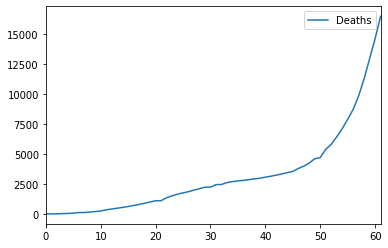

In [5]:
mortes.plot()

In [0]:
type(mortes)

pandas.core.frame.DataFrame

In [6]:
# O Prohphet espera que o dataframe possua duas colunas com os seguintes nomes: 
# ds, no formato YYYY-MM-DD e y, valor numérico que desejamos prever

#mudar o nome das colunas para ds e y
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
57,03/19/2020,9867.0
58,03/20/2020,11299.0
59,03/21/2020,12973.0
60,03/22/2020,14634.0
61,03/23/2020,16497.0


In [7]:
#colocar a data no formato YYYY-MM-DD
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
57,2020-03-19,9867.0
58,2020-03-20,11299.0
59,2020-03-21,12973.0
60,2020-03-22,14634.0
61,2020-03-23,16497.0


## Previsão de Mortes da COVID-19 no mundo

vamos realizar uma previsão de uma semana (periods=7 #dias), com intervalo de confiança de 95%.

### Confiança
Nas séries temporais a tendencia muda o tempo todo. Isso é histórico. Por isso é a coisa mais razoável possível é assumirmos que o futuro sofrerá mudanças de tendência.

Nesse caso, assumuremos um intervalo de confiana de 95%, ou seja, admitimos um erro de 5%

In [0]:
dias = 7

In [13]:
m = Prophet(interval_width=1)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
62,2020-03-24
63,2020-03-25
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [14]:
previsao = m.predict(futuro)
previsao.tail(dias)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
62,2020-03-24,14324.759032,12367.199322,16214.756253,14258.899641,14417.196420,-87.390438,-87.390438,-87.390438,-87.390438,-87.390438,-87.390438,0.0,0.0,0.0,14237.368594
63,2020-03-25,15078.338392,12795.740912,16802.072400,14891.770592,15300.970631,-80.365621,-80.365621,-80.365621,-80.365621,-80.365621,-80.365621,0.0,0.0,0.0,14997.972771
64,2020-03-26,15831.917752,13936.588946,17630.861979,15446.082432,16190.090959,-109.404768,-109.404768,-109.404768,-109.404768,-109.404768,-109.404768,0.0,0.0,0.0,15722.512984
65,2020-03-27,16585.497113,14618.791078,18533.781201,15979.817568,17092.234108,-59.223719,-59.223719,-59.223719,-59.223719,-59.223719,-59.223719,0.0,0.0,0.0,16526.273393
66,2020-03-28,17339.076473,15552.275048,19094.675213,16513.552703,17996.918620,10.731501,10.731501,10.731501,10.731501,10.731501,10.731501,0.0,0.0,0.0,17349.807974
67,2020-03-29,18092.655833,16076.037121,20162.989927,17046.242167,18910.674162,98.350993,98.350993,98.350993,98.350993,98.350993,98.350993,0.0,0.0,0.0,18191.006826
68,2020-03-30,18846.235193,17226.526412,21002.653064,17552.761115,19824.429704,227.302052,227.302052,227.302052,227.302052,227.302052,227.302052,0.0,0.0,0.0,19073.537246


In [15]:
previsao[['ds','yhat_lower','yhat','yhat_upper']].tail(dias)

,ds,yhat_lower,yhat,yhat_upper
62,2020-03-24,12367.199322,14237.368594,16214.756253
63,2020-03-25,12795.740912,14997.972771,16802.072400
64,2020-03-26,13936.588946,15722.512984,17630.861979
65,2020-03-27,14618.791078,16526.273393,18533.781201
66,2020-03-28,15552.275048,17349.807974,19094.675213
67,2020-03-29,16076.037121,18191.006826,20162.989927
68,2020-03-30,17226.526412,19073.537246,21002.653064


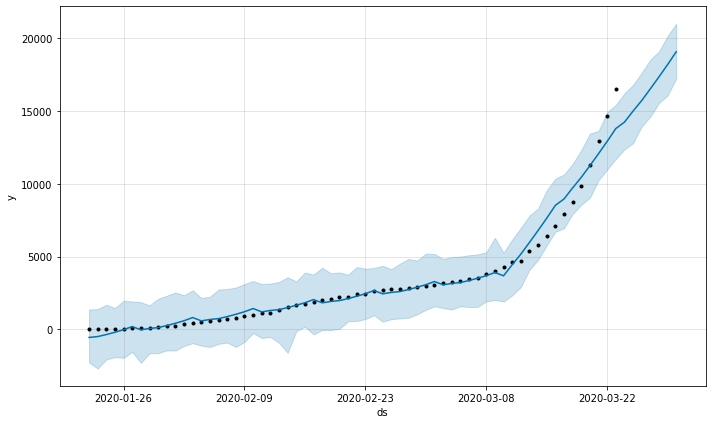

In [16]:
confirmed_forecast_plot = m.plot(previsao)